In [1]:
#import modules needed
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import linear_model
import sklearn

__Read in cleaned dataset__

In [2]:
df = df = pd.read_csv('availbikes2.csv', sep=',\s+', delimiter=',')

In [3]:
df=sklearn.utils.shuffle(df)

In [4]:
df.head()

,StationNumber,available_bikes_stands,available_bikes,description,temp,temp_min,temp_max,humidity,Day,Hour
125758,72,11,20,light rain,6,6,7,81,Friday,20
358359,19,7,23,broken clouds,12,11,13,87,Wednesday,9
128147,85,21,14,broken clouds,4,3,4,87,Saturday,1
171935,67,30,10,clear sky,14,13,14,58,Tuesday,15
122257,69,21,19,broken clouds,8,7,8,70,Friday,14


__Drop columns not needed for model__:

In [5]:
df=df.drop(['temp_min', 'temp_max', 'humidity'], axis=1)

In [6]:
df

,StationNumber,available_bikes_stands,available_bikes,description,temp,Day,Hour
125758,72,11,20,light rain,6,Friday,20
358359,19,7,23,broken clouds,12,Wednesday,9
128147,85,21,14,broken clouds,4,Saturday,1
171935,67,30,10,clear sky,14,Tuesday,15
122257,69,21,19,broken clouds,8,Friday,14
...,...,...,...,...,...,...,...
312294,88,28,2,light rain,10,Saturday,16
74658,30,18,2,broken clouds,9,Monday,18
187416,42,7,23,broken clouds,11,Wednesday,20
52851,63,33,2,scattered clouds,1,Sunday,0


In [7]:
df.StationNumber.unique()

array([ 72,  19,  85,  67,  69,  89,  45, 115,  33,  62,  97,  38,  27,
        34,  32,  66,  53, 110,  65,  80,  16,  58, 108,  68,  91,   4,
        36,  94,  30,  31, 117,  88,  29,   8,  56,  47, 114,  17,  95,
        28,  22,  87,  48, 103, 112,  75,  41,  44,  37, 106,  74,  21,
        23,  92,  83,  64, 100,  61,  18,  11,  57,  54,   6,  99,  73,
       111,  52,  98,  24,   9,  51,  93,  25, 116, 107, 102,  90,  10,
        55,  12,  50, 105,  15,  43, 109,  40,  59,  77,  39, 113,  86,
       104,  78,  76,  71, 101,   7,  49,  79,  84,  63,   5,  26,  96,
        82,  42,   3,  13,   2, 507], dtype=int64)

__Define a function to encode data__

In [8]:
def label_enocder(data, list_cat_cols):
    '''
    Apply Label encoder to the categorical columns (list_cat_cols) in data
    
    '''
    
    #Create Label Encoder 
    for column_name in list_cat_cols:
        #Apply label encoder to each column
        le = preprocessing.LabelEncoder()
        data[column_name + 'NEW'] = preprocessing.LabelEncoder().fit_transform(data[column_name])
        
    return data


__Declare Categorical Data__

In [9]:
list_le_cols=['description', 'Day']

In [10]:
df =  label_enocder(df, list_le_cols)

In [11]:
descriptionNEW_vals = df['descriptionNEW'].unique().tolist()
DayNEW_vals = df['DayNEW'].unique().tolist()

__Create Dictionaries to store the original and encoded values for each categorical Feature__

In [12]:
description_dict={}
for vals in descriptionNEW_vals:
    description_dict[df.loc[df['descriptionNEW'] == vals, 'description'].iloc[0]]=vals
description_dict

{'light rain': 5,
 'broken clouds': 0,
 'clear sky': 1,
 'mist': 7,
 'few clouds': 2,
 'moderate rain': 8,
 'scattered clouds': 10,
 'overcast clouds': 9,
 'light intensity drizzle': 4,
 'light snow': 6,
 'heavy intensity rain': 3}

In [13]:
DayDict={}
for vals in DayNEW_vals:
    DayDict[df.loc[df['DayNEW'] == vals, 'Day'].iloc[0]]=vals
DayDict  

{'Friday': 0,
 'Wednesday': 6,
 'Saturday': 2,
 'Tuesday': 5,
 'Thursday': 4,
 'Monday': 1,
 'Sunday': 3}

In [ ]:
DayDict={'Friday': 0,
 'Wednesday': 6,
 'Saturday': 2,
 'Tuesday': 5,
 'Thursday': 4,
 'Monday': 1,
 'Sunday': 3}

description_dict= {'light rain': 5,
 'broken clouds': 0,
 'clear sky': 1,
 'mist': 7,
 'few clouds': 2,
 'moderate rain': 8,
 'scattered clouds': 10,
 'overcast clouds': 9,
 'light intensity drizzle': 4,
 'light snow': 6,
 'heavy intensity rain': 3}

In [14]:
#drop the un encoded cat columns
df = df.drop(['Day', 'description'], axis=1)

In [15]:
df

,StationNumber,available_bikes_stands,available_bikes,temp,Hour,descriptionNEW,DayNEW
125758,72,11,20,6,20,5,0
358359,19,7,23,12,9,0,6
128147,85,21,14,4,1,0,2
171935,67,30,10,14,15,1,5
122257,69,21,19,8,14,0,0
...,...,...,...,...,...,...,...
312294,88,28,2,10,16,5,2
74658,30,18,2,9,18,0,1
187416,42,7,23,11,20,0,6
52851,63,33,2,1,0,10,3


__Seperate Dataframe into a list of df's grouped by station number__

In [16]:
dfseperated = [x for _, x in df.groupby('StationNumber')]
        

In [17]:
dfseperated[0]

,StationNumber,available_bikes_stands,available_bikes,temp,Hour,descriptionNEW,DayNEW
47947,2,17,3,7,15,0,2
139206,2,11,9,5,23,0,2
138863,2,11,9,5,22,5,2
57597,2,10,10,6,10,2,3
431868,2,13,7,-1,3,1,5
...,...,...,...,...,...,...,...
318520,2,20,0,11,4,0,3
273326,2,17,2,13,14,5,6
285225,2,12,8,11,13,10,4
353086,2,10,10,10,22,2,5


__Declare Target Values__

In [18]:
predict = 'available_bikes'

In [19]:
predictStands='available_bikes_stands'

__Store Station Numbers in List - Visualisation Purposes__

In [20]:
stations=[]
for index in range(len(dfseperated)):
    stations+=[dfseperated[index].StationNumber.unique().tolist()]
len(stations)

110

__KNeighbors Classifier for Bikes Available - Each station model stored in a dict__

In [21]:
import pickle
from sklearn.neighbors import KNeighborsClassifier
bikesDict={}
for index in range(len(dfseperated)):
    stationNum = (dfseperated[index].iloc[0].StationNumber)
    X = np.array(dfseperated[index].drop(['StationNumber','available_bikes', 'available_bikes_stands'], 1))
    y = np.array(dfseperated[index][predict])
   
    x_train,x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.3)
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(x_train, y_train)
   
    acc = model.score(x_test, y_test)
    print("Station Number:", stationNum) 
    print("Accuracy: ",acc*100)    
    bikesDict[stationNum]=model
    filename=(str(stationNum) + "Bikes.pkl")
    with open(filename, "wb") as f:
        pickle.dump(model, f)


Station Number: 2
Accuracy:  40.62244062244062
Station Number: 3
Accuracy:  41.78743961352657
Station Number: 4
Accuracy:  46.37062339880444
Station Number: 5
Accuracy:  30.345800988002825
Station Number: 6
Accuracy:  46.59468438538206
Station Number: 7
Accuracy:  49.78687127024723
Station Number: 8
Accuracy:  39.78159126365055
Station Number: 9
Accuracy:  31.477663230240548
Station Number: 10
Accuracy:  36.918382913806255
Station Number: 11
Accuracy:  59.87144168962351
Station Number: 12
Accuracy:  45.22240527182866
Station Number: 13
Accuracy:  57.726465364120784
Station Number: 15
Accuracy:  52.488687782805435
Station Number: 16
Accuracy:  53.89380530973451
Station Number: 17
Accuracy:  47.66277128547579
Station Number: 18
Accuracy:  36.0924683072334
Station Number: 19
Accuracy:  29.46490618485059
Station Number: 21
Accuracy:  41.490196078431374
Station Number: 22
Accuracy:  44.7000821692687
Station Number: 23
Accuracy:  38.23754789272031
Station Number: 24
Accuracy:  33.57717629846

__KNeighbors Classifier for Stands Available - Each station model stored in a dict__

In [22]:
import pickle
StandsDict={}
for index in range(len(dfseperated)):
    stationNum = (dfseperated[index].iloc[0].StationNumber)
    X = np.array(dfseperated[index].drop(['StationNumber','available_bikes_stands', 'available_bikes'], 1))
    y = np.array(dfseperated[index][predictStands])
   
    x_train,x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.3)
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(x_train, y_train)
    
    acc = model.score(x_test, y_test)
    print("Station Number:", stationNum)
    print("Accuracy: ",acc*100)    
    
    StandsDict[stationNum]=model
    filename=(str(stationNum) + "Stands.pkl")
    with open(filename, "wb") as f:
        pickle.dump(model, f)


Station Number: 2
Accuracy:  42.50614250614251
Station Number: 3
Accuracy:  41.14331723027375
Station Number: 4
Accuracy:  43.80871050384287
Station Number: 5
Accuracy:  29.146083274523644
Station Number: 6
Accuracy:  48.837209302325576
Station Number: 7
Accuracy:  45.78005115089514
Station Number: 8
Accuracy:  38.61154446177847
Station Number: 9
Accuracy:  31.40893470790378
Station Number: 10
Accuracy:  36.61327231121281
Station Number: 11
Accuracy:  59.68778696051423
Station Number: 12
Accuracy:  44.233937397034595
Station Number: 13
Accuracy:  58.170515097690945
Station Number: 15
Accuracy:  52.03619909502263
Station Number: 16
Accuracy:  53.1858407079646
Station Number: 17
Accuracy:  44.82470784641068
Station Number: 18
Accuracy:  34.3027591349739
Station Number: 19
Accuracy:  30.368311327310632
Station Number: 21
Accuracy:  40.78431372549019
Station Number: 22
Accuracy:  45.6861133935908
Station Number: 23
Accuracy:  36.0919540229885
Station Number: 24
Accuracy:  32.18727139722019

__Demonstrating Model for Station 507__

In [23]:
model_Station117=StandsDict[507]

In [24]:
predictions = model_Station117.predict(x_test)

In [25]:
# for x in range(len(predictions)):
#     print("Predicted: ", predictions[x], "Actual: ", y_test[x])

c:\users\jelly\anaconda3\envs\comp30830\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\jelly\anaconda3\envs\comp30830\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


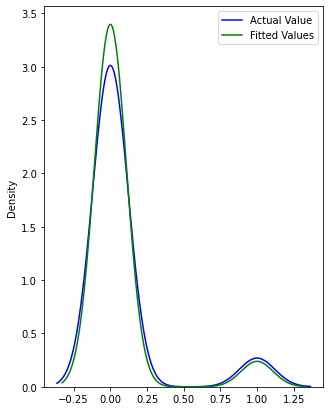

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(5, 7))
ax = sns.distplot(y_test, hist=False, color="b", label="Actual Value")
sns.distplot(predictions, hist=False, color="g", label="Fitted Values" , ax=ax)
plt.legend()
